In [ ]:
# 판다스 공식 문서 : https://pandas.pydata.org/docs/
# 라이브러리 최초 설치 시 느낌표를 앞에 붙임 (ex. !pip install pandas)

In [6]:
from google.colab import drive
drive.mount('/content/drive/')
!cd ./MyDrive/ML/ADP-실기(2024)/2강/

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).
/bin/bash: -c: line 1: syntax error near unexpected token `('
/bin/bash: -c: line 1: `cd ./MyDrive/ML/ADP-실기(2024)/2강/'


In [ ]:
!pip install pandas

# 데이터 다루기 기본



# 0) 판다스 자료형
* Series()
* DataFrame()

In [ ]:
import pandas as pd
pd.Series([1,2,3], index = ['a','b','c'])

a    1
b    2
c    3
dtype: int64

In [ ]:
import pandas as pd
data = pd.DataFrame({'이름' : ['홍길동','홍길산','홍길영'], '나이' : [10,20,30]})

In [ ]:
data

,이름,나이
0,홍길동,10
1,홍길산,20
2,홍길영,30



## 1) 데이터 불러오기
* from ~ import 문
* import ~ as 문
* pd.read_csv('file', encoding = 'cp949')
<br>


In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
import pandas as pd
data = pd.read_csv('./sample_data/california_housing_test.csv',encoding = 'cp949')

## 2) 데이터 살펴보기
* df.shape
* df.info()
*df.describe()
* df.head()
* df.tail()
* df.unique()
* df.value_counts()


In [ ]:
import seaborn as sns
df = sns.load_dataset('titanic')

In [ ]:
print('행의 수 : ', df.shape[0])
print('열의 수 : ', df.shape[1])

행의 수 :  891
열의 수 :  15


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [ ]:
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [ ]:
df.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
df.tail(12)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
879,1,1,female,56.0,0,1,83.1583,C,First,woman,False,C,Cherbourg,yes,False
880,1,2,female,25.0,0,1,26.0000,S,Second,woman,False,NaN,Southampton,yes,False
881,0,3,male,33.0,0,0,7.8958,S,Third,man,True,NaN,Southampton,no,True
882,0,3,female,22.0,0,0,10.5167,S,Third,woman,False,NaN,Southampton,no,True
883,0,2,male,28.0,0,0,10.5000,S,Second,man,True,NaN,Southampton,no,True
884,0,3,male,25.0,0,0,7.0500,S,Third,man,True,NaN,Southampton,no,True
885,0,3,female,39.0,0,5,29.1250,Q,Third,woman,False,NaN,Queenstown,no,False
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False


In [ ]:
df['survived'].unique()

array([0, 1])

In [ ]:
df['pclass'].value_counts()

pclass
3    491
1    216
2    184
Name: count, dtype: int64



## 3) 결측치 확인 및 처리
* isnull()
* fillna()
* dropna(inplace = True)
* drop_duplicates() 중복행삭제



In [ ]:
df1 = df.copy()
df2 = df.copy()

In [ ]:
df1['age'].fillna(df1['age'].mean(), inplace = True)

In [ ]:
df2.dropna(inplace = True)

In [ ]:
df2

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
10,1,3,female,4.0,1,1,16.7000,S,Third,child,False,G,Southampton,yes,False
11,1,1,female,58.0,0,0,26.5500,S,First,woman,False,C,Southampton,yes,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
871,1,1,female,47.0,1,1,52.5542,S,First,woman,False,D,Southampton,yes,False
872,0,1,male,33.0,0,0,5.0000,S,First,man,True,B,Southampton,no,True
879,1,1,female,56.0,0,1,83.1583,C,First,woman,False,C,Cherbourg,yes,False
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True


In [ ]:
df.drop_duplicates(subset = ['survived','pclass'])

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
9,1,2,female,14.0,1,0,30.0708,C,Second,child,False,NaN,Cherbourg,yes,False
20,0,2,male,35.0,0,0,26.0000,S,Second,man,True,NaN,Southampton,no,True


## 4) 이상치 확인 및 조정
* box-plot
* IQR = Q3 - Q1
* Q1 – 1.5 * IQR 미만이나 Q3 + 1.5 * IQR 초과데이터를 이상치로 탐지

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


<Axes: >

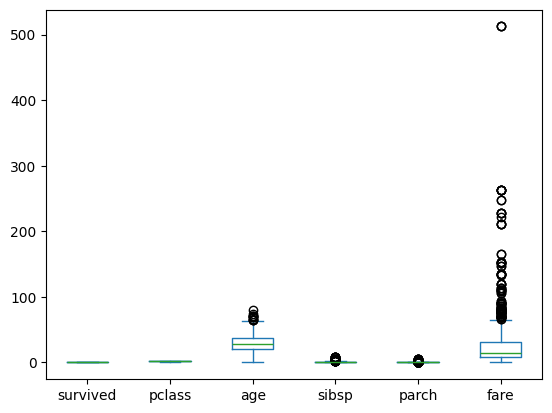

In [10]:
import seaborn as sns
dft = sns.load_dataset('titanic')

# dataframe을 box plot으로 표현
dft.info()
dft.plot(kind='box')

<Axes: >

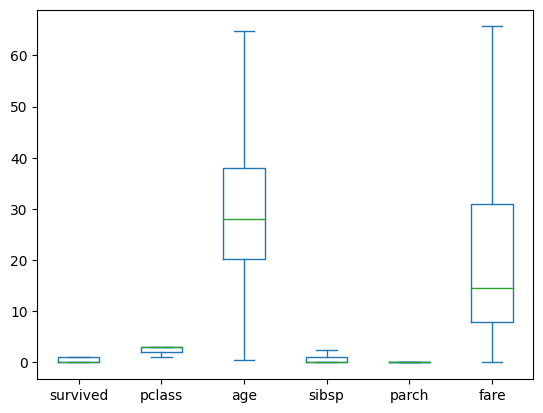

In [ ]:
# dataframe에서 int, float 열만 추출
numeric_df = df.select_dtypes(include = [int, float])
numeric_df.columns # 6개
numeric = list(numeric_df.columns)

# 각 열에 대하여 IQR 기반으로 이상치 제거
for col in numeric:
  IQR = df[col].quantile(0.75) - df[col].quantile(0.25)
  upper_bound = df[col].quantile(0.75) + IQR*1.5
  lower_bound = df[col].quantile(0.25) - IQR*1.5
  df[col] = df[col].clip(lower_bound, upper_bound)

# 이상치가 제거된 DataFrame의 박스 플롯
df.plot(kind = 'box')


## 5) 데이터 붙이기
* concat(), merge()

In [ ]:
import pandas as pd
df1 = pd.read_csv('신상정보1.csv', encoding='cp949')
df2 = pd.read_csv('신상정보2.csv', encoding='cp949')
print(df1)
print('-----')
print(df2)

    이름  나이    키
0  김철수  30  177
1  이영희  20  165
2  박민지  24  158
3  정소라  21  163
-----
    이름     과목  학점
0  김철수  통계학개론   A
1  김철수   재료공학  B-
2  김철수   이산수학  A+
3  정소라   재료공학   C
4  유바다   이산수학  B+
5  이영희  통계학개론  A+


In [ ]:
concat_0 = pd.concat([df1, df2], axis = 0, ignore_index = True)

In [ ]:
pd.concat([df1, df2], axis = 1)

,이름,나이,키,이름,과목,학점
0,김철수,30.0,177.0,김철수,통계학개론,A
1,이영희,20.0,165.0,김철수,재료공학,B-
2,박민지,24.0,158.0,김철수,이산수학,A+
3,정소라,21.0,163.0,정소라,재료공학,C
4,NaN,NaN,NaN,유바다,이산수학,B+
5,NaN,NaN,NaN,이영희,통계학개론,A+


In [ ]:
# df1 => 민지 , df2 = 바다
pd.merge(df1, df2, how = 'right')


,이름,나이,키,과목,학점
0,김철수,30.0,177.0,통계학개론,A
1,김철수,30.0,177.0,재료공학,B-
2,김철수,30.0,177.0,이산수학,A+
3,정소라,21.0,163.0,재료공학,C
4,유바다,NaN,NaN,이산수학,B+
5,이영희,20.0,165.0,통계학개론,A+


In [ ]:
df2.columns = ['성함','과목','학점']

In [ ]:
pd.merge(df1, df2, how = 'right', left_on = '이름', right_on = '성함')

,이름,나이,키,성함,과목,학점
0,김철수,30.0,177.0,김철수,통계학개론,A
1,김철수,30.0,177.0,김철수,재료공학,B-
2,김철수,30.0,177.0,김철수,이산수학,A+
3,정소라,21.0,163.0,정소라,재료공학,C
4,NaN,NaN,NaN,유바다,이산수학,B+
5,이영희,20.0,165.0,이영희,통계학개론,A+


## 6) 그룹으로 묶어서 보기
* groupby()

In [ ]:
import seaborn as sns
df = sns.load_dataset('iris')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [ ]:
# species 특성 기준으로 그룹화한 후 다른 각 특성의 평균 구하기
df.groupby('species').mean()

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
setosa,5.006,3.428,1.462,0.246
versicolor,5.936,2.770,4.260,1.326
virginica,6.588,2.974,5.552,2.026


In [ ]:
# species 특성 기준으로 그룹화한 후, sepal_length의 중앙값, sepal_width의 분산, petal_length의 평균, petal_width의 최대값 구하기.
df.groupby('species').agg({'sepal_length' : 'median',
                           'sepal_width' : 'var',
                           'petal_length':'mean',
                           'petal_width' : 'max'})

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
setosa,5.0,0.143690,1.462,0.6
versicolor,5.9,0.098469,4.260,1.8
virginica,6.5,0.104004,5.552,2.5



## 7) 행/열

### 7-1) 행/열 선택 및 조건 필터링
* .iloc[]
* .loc[]
* &, |

### 7-2) 열 이름 변경
* df.rename()
* df.columns = ['new','new2']
* df.columns = df.columns.str.replace('기존문자' , '대체문자')

### 7-3) 열 삭제
* df.drop()


In [ ]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [ ]:
# iloc 써서 첫번째 열만 표시
df.iloc[:,0]

0      5.1
1      4.9
2      4.7
3      4.6
4      5.0
      ... 
145    6.7
146    6.3
147    6.5
148    6.2
149    5.9
Name: sepal_length, Length: 150, dtype: float64

In [ ]:
# setosa라는 품종만 선택해서 가져오기
condition = (df['species'] == 'setosa')
df.loc[condition , 'petal_length']

0     1.4
1     1.4
2     1.3
3     1.5
4     1.4
5     1.7
6     1.4
7     1.5
8     1.4
9     1.5
10    1.5
11    1.6
12    1.4
13    1.1
14    1.2
15    1.5
16    1.3
17    1.4
18    1.7
19    1.5
20    1.7
21    1.5
22    1.0
23    1.7
24    1.9
25    1.6
26    1.6
27    1.5
28    1.4
29    1.6
30    1.6
31    1.5
32    1.5
33    1.4
34    1.5
35    1.2
36    1.3
37    1.4
38    1.3
39    1.5
40    1.3
41    1.3
42    1.3
43    1.6
44    1.9
45    1.4
46    1.6
47    1.4
48    1.5
49    1.4
Name: petal_length, dtype: float64

In [ ]:
# 품종이 setosa이면서, petal_length가 1.4이상인 것만 가져오기
condition2 = (df['species'] == 'setosa') | (df['petal_length'] >= 1.4)
df.loc[condition2]

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa
10,5.4,3.7,1.5,0.2,setosa


In [ ]:
# rename 함수로 열이름 변경
'''
df.rename()
df.columns = df.columns.str.replace('기존문자' , '대체문자')
'''
df.rename(columns = {'species' : '품종'}, inplace = True)

In [ ]:
# replace 함수로 열이름 변경
df.columns = df.columns.str.replace('품종', 'species')

In [ ]:
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


## 8) 정렬
  - sort_index()
  - sort_index(axis = 1)
  - sort_values(by='컬럼명')
  - sort_values(by=['컬럼명', '컬럼명2'])



In [ ]:
# 인덱스 기준으로 정렬하기
df.sort_index(ascending = False)

,sepal_length,sepal_width,petal_length,petal_width,species
149,5.9,3.0,5.1,1.8,virginica
148,6.2,3.4,5.4,2.3,virginica
147,6.5,3.0,5.2,2.0,virginica
146,6.3,2.5,5.0,1.9,virginica
145,6.7,3.0,5.2,2.3,virginica
...,...,...,...,...,...
4,5.0,3.6,1.4,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa


In [ ]:
# 열 지정하여 정렬하기
df.sort_values(by = 'sepal_length', ascending = False)

,sepal_length,sepal_width,petal_length,petal_width,species
131,7.9,3.8,6.4,2.0,virginica
117,7.7,3.8,6.7,2.2,virginica
135,7.7,3.0,6.1,2.3,virginica
122,7.7,2.8,6.7,2.0,virginica
118,7.7,2.6,6.9,2.3,virginica
...,...,...,...,...,...
41,4.5,2.3,1.3,0.3,setosa
42,4.4,3.2,1.3,0.2,setosa
38,4.4,3.0,1.3,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa


## 9) 자료형 변경
* df.dtypes
* df['컬럼명'] = df['컬럼명'].astype('타입')
* df.convert_dtypes() 가장 적절한 dtype으로 변경



In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [ ]:
# 열의 데이터형을 조회하고 형변환하기
df['sepal_length'].dtypes
df['sepal_length'] = df['sepal_length'].astype('int')
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5,3.5,1.4,0.2,setosa
1,4,3.0,1.4,0.2,setosa
2,4,3.2,1.3,0.2,setosa
3,4,3.1,1.5,0.2,setosa
4,5,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6,3.0,5.2,2.3,virginica
146,6,2.5,5.0,1.9,virginica
147,6,3.0,5.2,2.0,virginica
148,6,3.4,5.4,2.3,virginica


In [ ]:
# dataframe의 각 열의 데이터형을 적정 데이터형으로 변환
conv_df = df.convert_dtypes()
conv_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    Int64  
 1   sepal_width   150 non-null    Float64
 2   petal_length  150 non-null    Float64
 3   petal_width   150 non-null    Float64
 4   species       150 non-null    string 
dtypes: Float64(3), Int64(1), string(1)
memory usage: 6.6 KB



## 10) 문자열 데이터 다루기
* df['컬럼명'].str.split("기준문자", expand = True)

In [ ]:
import pandas as pd
df = pd.read_csv('./한국지역난방공사_날씨정보.csv', encoding = 'cp949')


In [ ]:
df.head()

# 연도열의 데이터를 '-'를 분할자로 지정하여 연/월/일 열 생성
df['연도'] = df['일자'].str.split('-').str.get(0)
df['월'] =df['일자'].str.split('-').str.get(1)
df['일'] =df['일자'].str.split('-').str.get(2)
df

,일자,시간,날씨,연도,월,일
0,2017-02-14,1,맑음,2017,02,14
1,2017-02-14,2,맑음,2017,02,14
2,2017-02-14,5,맑음,2017,02,14
3,2017-02-14,9,맑음,2017,02,14
4,2017-02-14,10,맑음,2017,02,14
...,...,...,...,...,...,...
46090,2023-06-26,1,비,2023,06,26
46091,2023-06-26,2,비,2023,06,26
46092,2023-06-26,3,비,2023,06,26
46093,2023-06-26,4,비,2023,06,26


In [ ]:
import seaborn as sns
iris = sns.load_dataset('iris')
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [ ]:
# species 열의 데이터에 & 붙이기
iris['species']= iris['species'] + '$'
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa$
1,4.9,3.0,1.4,0.2,setosa$
2,4.7,3.2,1.3,0.2,setosa$
3,4.6,3.1,1.5,0.2,setosa$
4,5.0,3.6,1.4,0.2,setosa$
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica$
146,6.3,2.5,5.0,1.9,virginica$
147,6.5,3.0,5.2,2.0,virginica$
148,6.2,3.4,5.4,2.3,virginica$


In [ ]:
# species 열의 데이터에서 & 떼어내기
iris['species'] = iris['species'].str.split('$').str.get(0)
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


## 11) 날짜 데이터 핸들링
* datetime 모듈
* dt 모듈

In [ ]:
import pandas as pd

# '한국지역난방공사_날씨정보.csv' 읽어들일 때 '일자'를 datetime 형식으로 지정
df = pd.read_csv('한국지역난방공사_날씨정보.csv', encoding = 'cp949', parse_dates = ['일자'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46095 entries, 0 to 46094
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   일자      46095 non-null  datetime64[ns]
 1   시간      46095 non-null  int64         
 2   날씨      46095 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.1+ MB


In [ ]:
# datetime 형식의 데이터에서 연/월/일 값 읽어들이기
df['year']= df['일자'].dt.year
df['month']= df['일자'].dt.month
df['day']= df['일자'].dt.day
df

,일자,시간,날씨,year,month,day
0,2017-02-14,1,맑음,2017,2,14
1,2017-02-14,2,맑음,2017,2,14
2,2017-02-14,5,맑음,2017,2,14
3,2017-02-14,9,맑음,2017,2,14
4,2017-02-14,10,맑음,2017,2,14
...,...,...,...,...,...,...
46090,2023-06-26,1,비,2023,6,26
46091,2023-06-26,2,비,2023,6,26
46092,2023-06-26,3,비,2023,6,26
46093,2023-06-26,4,비,2023,6,26


In [ ]:
#일반 문자열형식의 날짜 데이터열을 datetime 형식의 열로 변환하기
date_str = '05/15/2023'
result = pd.to_datetime(date_str, format='%m/%d/%Y')

#문자열에서 날짜,시간값 추출하기
date_str2 = '2023-06-15 13:40:30'
result = pd.to_datetime(date_str2, format = '%Y-%m-%d %H:%M:%S')
result


Timestamp('2023-06-15 13:40:30')

#12) 데이터 스케일링
* 정규화 : MinMaxScaler -> 최대/최소값이 각각 1,0이 되도록 스케일링
* 표준화 : StandardScaler -> 평균을 0,표준편차를 1로 만드는 과정

In [ ]:
import seaborn as sns
import pandas as pd
titanic = sns.load_dataset('titanic')

titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [ ]:
# dataframe에서 특정 데이터형식의 열만 분리하기
numeric_df = titanic.select_dtypes(include = ['int','float'])
numeric_df

# dataframe 전체를 MinMax Scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
titanic1 = pd.DataFrame(sc.fit_transform(numeric_df), columns=numeric_df.columns)
titanic1.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,0.654321,0.367921,0.065376,0.063599,0.062858
std,0.486592,0.418036,0.182540,0.137843,0.134343,0.096995
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.500000,0.247612,0.000000,0.000000,0.015440
50%,0.000000,1.000000,0.346569,0.000000,0.000000,0.028213
75%,1.000000,1.000000,0.472229,0.125000,0.000000,0.060508
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
# dataframe 전체를 Standard Scaling
from sklearn.preprocessing import StandardScaler
sc2 = StandardScaler()
titanic2 = pd.DataFrame(sc2.fit_transform(numeric_df), columns = numeric_df.columns)
titanic2.describe()

,survived,pclass,age,sibsp,parch,fare
count,8.910000e+02,8.910000e+02,7.140000e+02,8.910000e+02,8.910000e+02,8.910000e+02
mean,3.987333e-17,-8.772133e-17,2.388379e-16,4.386066e-17,5.382900e-17,3.987333e-18
std,1.000562e+00,1.000562e+00,1.000701e+00,1.000562e+00,1.000562e+00,1.000562e+00
min,-7.892723e-01,-1.566107e+00,-2.016979e+00,-4.745452e-01,-4.736736e-01,-6.484217e-01
25%,-7.892723e-01,-3.693648e-01,-6.595416e-01,-4.745452e-01,-4.736736e-01,-4.891482e-01
50%,-7.892723e-01,8.273772e-01,-1.170488e-01,-4.745452e-01,-4.736736e-01,-3.573909e-01
75%,1.266990e+00,8.273772e-01,5.718310e-01,4.327934e-01,-4.736736e-01,-2.424635e-02
max,1.266990e+00,8.273772e-01,3.465126e+00,6.784163e+00,6.974147e+00,9.667167e+00


# 13) 범주형 데이터 인코딩

In [ ]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [ ]:
# dataframe에서 object 타입의 열만 분리하기
cat_df = titanic.select_dtypes(include = 'object')
# dataframe 전체에 대하여 원핫인코딩
pd.get_dummies(titanic,columns = cat_df.columns)

,survived,pclass,age,sibsp,parch,fare,class,adult_male,deck,alone,...,embarked_Q,embarked_S,who_child,who_man,who_woman,embark_town_Cherbourg,embark_town_Queenstown,embark_town_Southampton,alive_no,alive_yes
0,0,3,22.0,1,0,7.2500,Third,True,NaN,False,...,False,True,False,True,False,False,False,True,True,False
1,1,1,38.0,1,0,71.2833,First,False,C,False,...,False,False,False,False,True,True,False,False,False,True
2,1,3,26.0,0,0,7.9250,Third,False,NaN,True,...,False,True,False,False,True,False,False,True,False,True
3,1,1,35.0,1,0,53.1000,First,False,C,False,...,False,True,False,False,True,False,False,True,False,True
4,0,3,35.0,0,0,8.0500,Third,True,NaN,True,...,False,True,False,True,False,False,False,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,27.0,0,0,13.0000,Second,True,NaN,True,...,False,True,False,True,False,False,False,True,True,False
887,1,1,19.0,0,0,30.0000,First,False,B,True,...,False,True,False,False,True,False,False,True,False,True
888,0,3,NaN,1,2,23.4500,Third,False,NaN,False,...,False,True,False,False,True,False,False,True,True,False
889,1,1,26.0,0,0,30.0000,First,True,C,True,...,False,False,False,True,False,True,False,False,False,True


In [ ]:
# dataframe에서 object, category 타입의 열만 분리하기
from sklearn.preprocessing import LabelEncoder
cat_df = titanic.select_dtypes(include = ['object','category'])

# object, category 타입의 열에 대하여 라벨인코딩 적용하기 (for문 사용)
encoders = {}
for col in cat_df.columns:
  encoder = LabelEncoder()
  titanic[col] = encoder.fit_transform(titanic[col])
  encoders[col] = encoder

titanic


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,1,22.0,1,0,7.2500,2,2,1,True,7,2,0,False
1,1,1,0,38.0,1,0,71.2833,0,0,2,False,2,0,1,False
2,1,3,0,26.0,0,0,7.9250,2,2,2,False,7,2,1,True
3,1,1,0,35.0,1,0,53.1000,2,0,2,False,2,2,1,False
4,0,3,1,35.0,0,0,8.0500,2,2,1,True,7,2,0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,1,27.0,0,0,13.0000,2,1,1,True,7,2,0,True
887,1,1,0,19.0,0,0,30.0000,2,0,2,False,1,2,1,True
888,0,3,0,NaN,1,2,23.4500,2,2,2,False,7,2,0,False
889,1,1,1,26.0,0,0,30.0000,0,0,1,True,2,0,1,True


# 14) 데이터 분할
### 기계 학습 모델을 평가하고 일반화하기 위해 데이터를 두 그룹으로 나누는 데 사용



In [ ]:
# train(0.7) / test(0.3)
condition = round(titanic.shape[0] * 0.7)
train = titanic.iloc[:condition]
train

test = titanic.iloc[condition :]
test

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
624,0,3,1,21.0,0,0,16.1000,2,2,1,True,7,2,0,True
625,0,1,1,61.0,0,0,32.3208,2,0,1,True,3,2,0,True
626,0,2,1,57.0,0,0,12.3500,1,1,1,True,7,1,0,True
627,1,1,0,21.0,0,0,77.9583,2,0,2,False,3,2,1,True
628,0,3,1,26.0,0,0,7.8958,2,2,1,True,7,2,0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,1,27.0,0,0,13.0000,2,1,1,True,7,2,0,True
887,1,1,0,19.0,0,0,30.0000,2,0,2,False,1,2,1,True
888,0,3,0,NaN,1,2,23.4500,2,2,2,False,7,2,0,False
889,1,1,1,26.0,0,0,30.0000,0,0,1,True,2,0,1,True


In [ ]:
X = titanic[['pclass']]
y = titanic['survived']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test,y_train, y_test= train_test_split(X,y, random_state = 2021, stratify =y, test_size = 0.3)


In [ ]:
X_train
X_test

,pclass
672,2
832,3
435,1
618,2
49,3
...,...
329,1
637,2
109,3
141,3


# 15) 그래프 기초
* fig와 axes
* 수치형 그래프
 * 히스토그램, 박스플롯 등
* 범주형 그래프
 * 막대그래프, 파이차트 등

In [ ]:
import seaborn as sns
df = sns.load_dataset('iris')
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [ ]:
!pip install koreanize-matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 1.6 MB/s eta 0:00:00


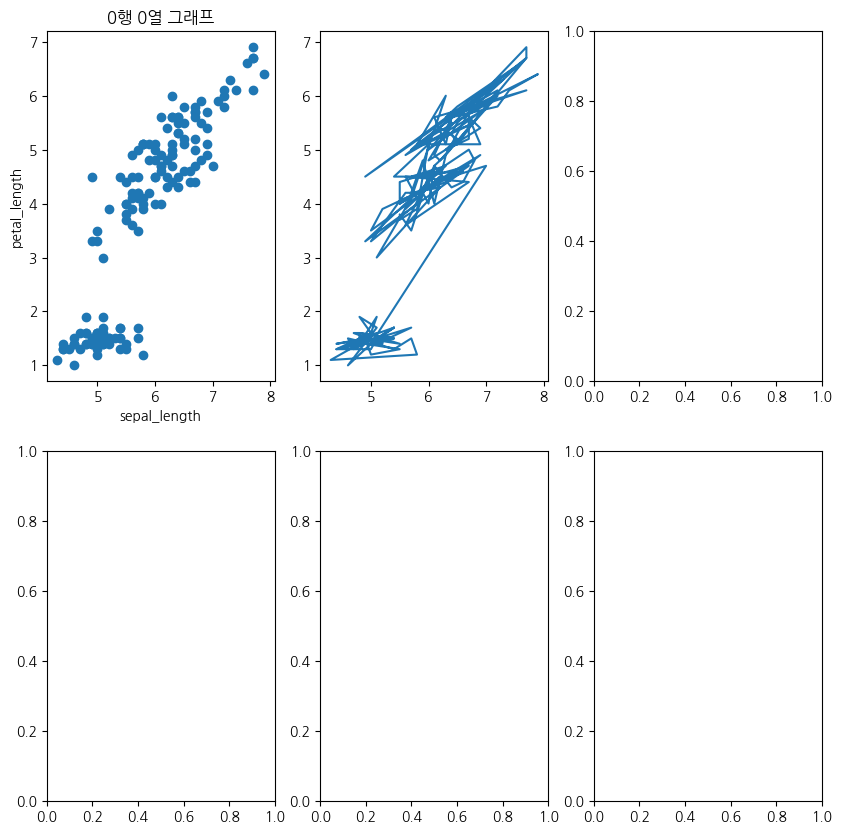

In [ ]:
import matplotlib.pyplot as plt
import koreanize_matplotlib
fig, axes = plt.subplots(2,3, figsize = (10,10))
axes[0][0].set_title('0행 0열 그래프')
axes[0][0].set_xlabel('sepal_length')
axes[0][0].set_ylabel('petal_length')
axes[0][0].scatter(df['sepal_length'], df['petal_length'])
axes[0][1].plot(df['sepal_length'],df['petal_length'])